In [1]:
import pandas as pd
from glob import glob

df = pd.concat(objs=[pd.read_csv(filepath_or_buffer=input_file, 
                                 parse_dates=['started_at', 'ended_at']
                                ) for input_file in glob('/kaggle/input/bike-share/*.csv')])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5779444 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 617.3+ MB


In [2]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    857860
start_station_id      857992
end_station_name      915655
end_station_id        915796
start_lat                  0
start_lng                  0
end_lat                 5795
end_lng                 5795
member_casual              0
dtype: int64

In [3]:
df.nunique()

ride_id               5779444
rideable_type               3
started_at            4862473
ended_at              4875344
start_station_name       1820
start_station_id         1498
end_station_name         1821
end_station_id           1498
start_lat              772920
start_lng              730231
end_lat                 13720
end_lng                 13834
member_casual               2
dtype: int64

In [4]:
df.sample(n=10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
680934,DCBD01BCE99EC3D8,electric_bike,2022-09-10 10:12:37,2022-09-10 10:33:36,Broadway & Wilson - Truman College Vaccination...,13074,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,41.965221,-87.658370,41.932588,-87.636427,casual
50529,4B947CB2CBC4D553,electric_bike,2023-05-26 11:12:17,2023-05-26 11:27:12,Southport Ave & Belmont Ave,13229,Clark St & Winnemac Ave,TA1309000035,41.939419,-87.663690,41.973348,-87.667855,member
683608,BDD6088A8A1329BB,electric_bike,2022-07-25 11:13:26,2022-07-25 11:18:39,Rush St & Superior St,15530,NaN,NaN,41.895794,-87.625624,41.900000,-87.640000,casual
39870,A119E5B29B51A610,classic_bike,2022-12-30 06:10:49,2022-12-30 06:21:12,McClurg Ct & Ohio St,TA1306000029,Wacker Dr & Washington St,KA1503000072,41.892592,-87.617289,41.883143,-87.637242,member
86879,8F6ACFE51665D5B7,electric_bike,2023-01-31 14:34:55,2023-01-31 14:51:49,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.950000,-87.720000,member
462740,05C6DA88F97FB876,electric_bike,2022-07-20 17:04:18,2022-07-20 17:17:46,Canal St & Taylor St,15550,Green St & Madison St,TA1307000120,41.870109,-87.639481,41.881892,-87.648789,casual
445815,8E3AFE37997667F9,electric_bike,2022-09-02 06:38:00,2022-09-02 06:40:03,MLK Jr Dr & 56th St,KA1503000073,NaN,NaN,41.793458,-87.615845,41.790000,-87.620000,member
182448,420DF3FC373BD6E0,electric_bike,2023-01-08 12:29:32,2023-01-08 12:40:45,Sedgwick St & North Ave,TA1307000038,Wabash Ave & Grand Ave,TA1307000117,41.911379,-87.638657,41.891466,-87.626761,member
238654,4BCF4F09D073E9F4,classic_bike,2023-06-16 11:29:36,2023-06-16 11:44:13,Halsted St & Willow St,TA1307000166,Clybourn Ave & Division St,TA1307000115,41.913865,-87.648755,41.904613,-87.640552,member
456016,43D87049E040EAFF,electric_bike,2022-08-09 17:24:32,2022-08-09 17:35:34,Larrabee St & Division St,KA1504000079,NaN,NaN,41.903446,-87.643360,41.910000,-87.620000,casual


<Axes: >

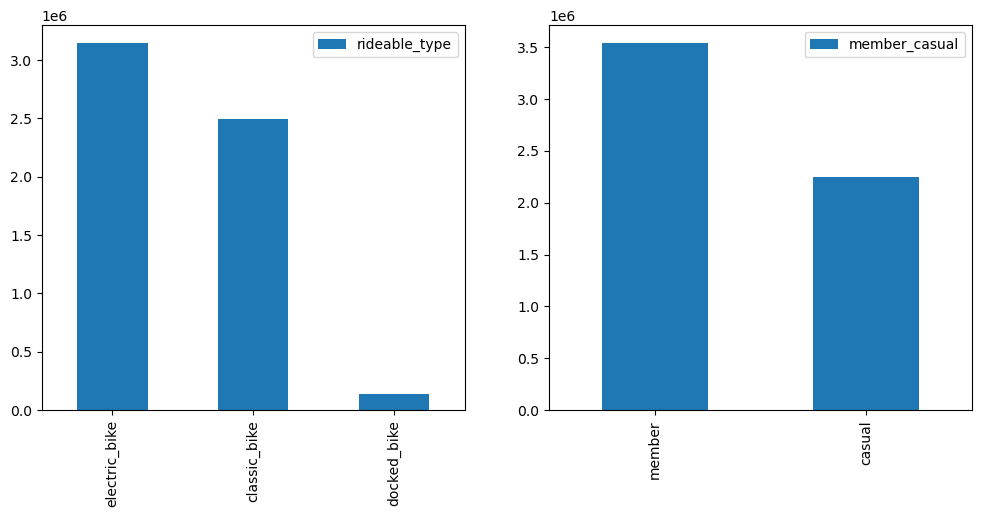

In [5]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 5), ncols=2,)
df['rideable_type'].value_counts().plot(ax=ax[0], kind='bar', legend=True)
df['member_casual'].value_counts().plot(ax=ax[1], kind='bar', legend=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='rideable_type', ylabel='member_casual'>

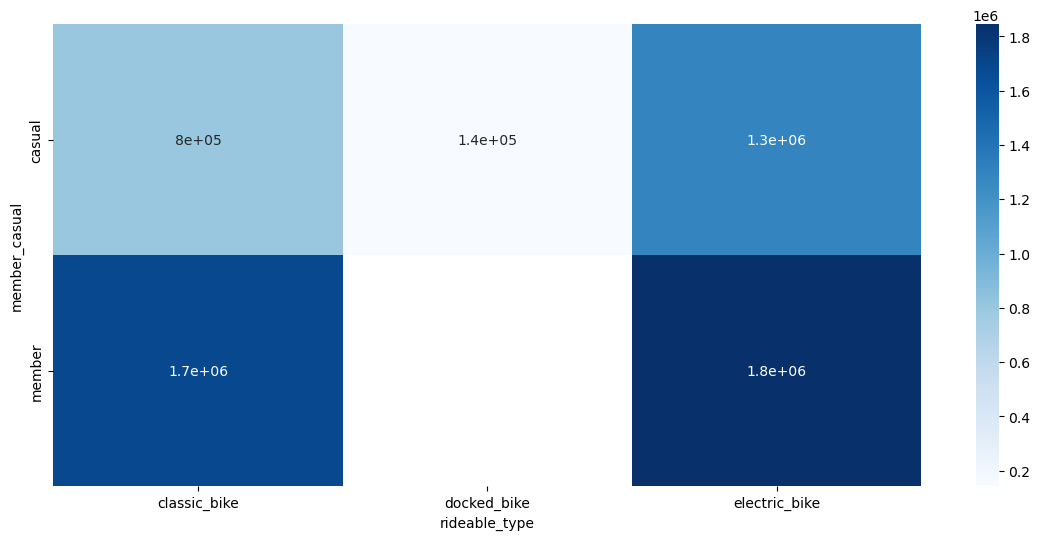

In [6]:
from seaborn import heatmap
_, ax = subplots(figsize=(14, 6),)
person_bike = ['rideable_type', 'member_casual']
heatmap(annot=True, cmap='Blues', data=pd.pivot_table(data=df[person_bike].groupby(person_bike).size().reset_index(),
                                          index=person_bike[1], columns=person_bike[0], values=0), square=False, )

<Axes: xlabel='start_lat', ylabel='start_lng'>

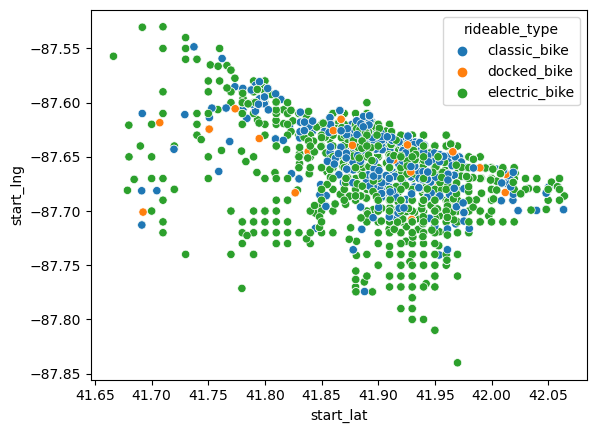

In [7]:
from seaborn import scatterplot
scatterplot(data=df.sample(n=10000), x='start_lat', y='start_lng', hue='rideable_type')

In [8]:
import plotly.graph_objects as go

sample_df = df.sample(n=50000)
fig = go.Figure(data=go.Scattergeo(
        lon = sample_df['start_lng'],
        lat = sample_df['start_lat'],
        text = sample_df['member_casual'],
        mode = 'markers',
#         marker_color = sample_df['rideable_type']
        ))

fig.update_layout(
        title = 'Bikes!',
        geo_scope='usa'
    )
fig.update_geos(fitbounds='locations')
fig.show()
